# Rapid EDA 1 - Phase 2
## Calories and Exercise Data

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 16
plt.style.use('seaborn-v0_8')
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

In [ ]:
calories = pd.read_csv('../data/calories-and-exercise/calories.csv')
exercise = pd.read_csv('../data/calories-and-exercise/exercise.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
print(calories['User_ID'].nunique(), exercise['User_ID'].nunique())

15000 15000


In [ ]:
exercise_calories = exercise.merge(calories, on="User_ID")

In [ ]:
exercise_calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
exercise_calories.describe(include='all')

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.497736e+07,NaN,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,NaN,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,NaN,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,NaN,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,NaN,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,NaN,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000


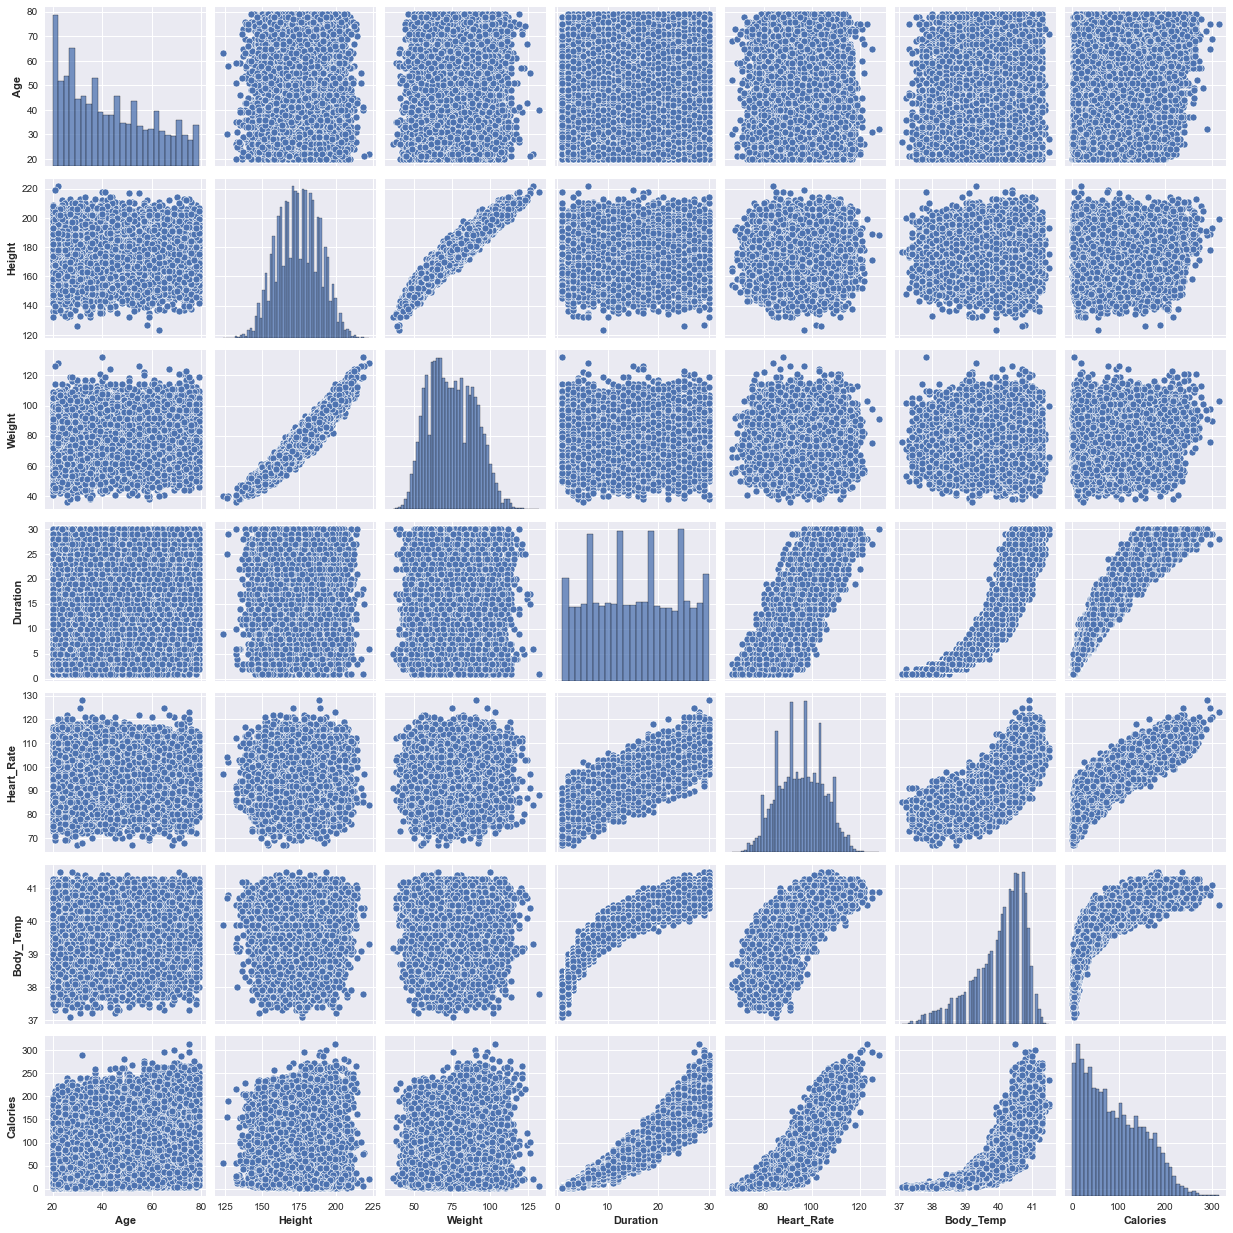

In [ ]:
sns.pairplot(data=exercise_calories.loc[:, "Age":]);

#### Question: What is the correlation of each variable?

<Axes: >

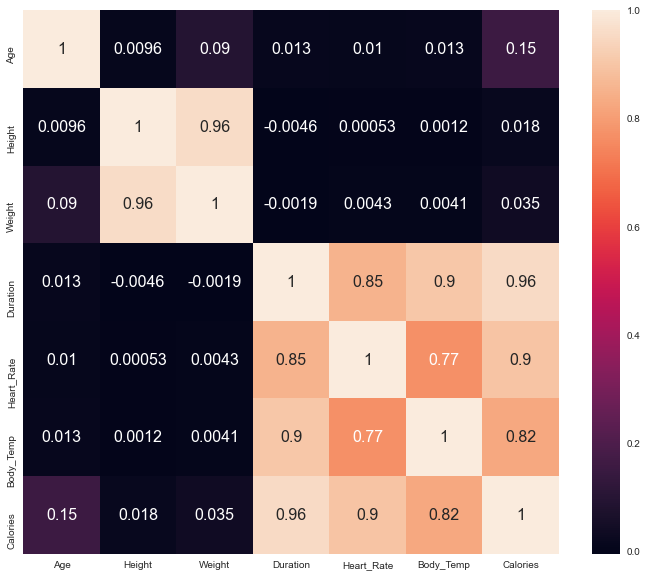

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(exercise_calories.loc[:,'Age':].corr(), ax=ax, annot=True)

There are several plots here that show very obvious relationships between certain variables; height and weight, heart rate and body temp, body temp and calories, etc.

Age seems to have no correlation with anything.

#### Question: What is the probability distribution of calories burned across genders?

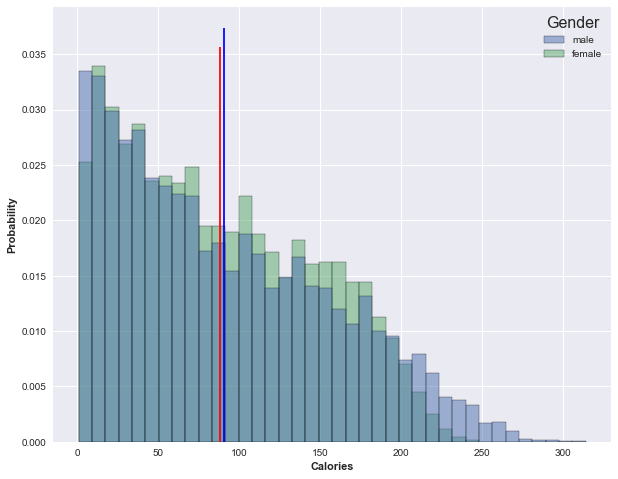

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=exercise_calories, x="Calories", hue='Gender', ax=ax, legend=True, stat='probability');
plt.vlines(ymin = ax.get_ylim()[0], ymax = ax.get_ylim()[1], x=exercise_calories[exercise_calories['Gender'] == 'female']["Calories"].mean(), colors='r');
plt.vlines(ymin = ax.get_ylim()[0], ymax = ax.get_ylim()[1], x=exercise_calories[exercise_calories['Gender'] == 'male']["Calories"].mean(), colors='b');

The distributions appear very similar, both are very right skewed. The means of both male and female are very close, though the female mean is only slightly less than the male mean.

#### Question: What is the spread of each numerical column?

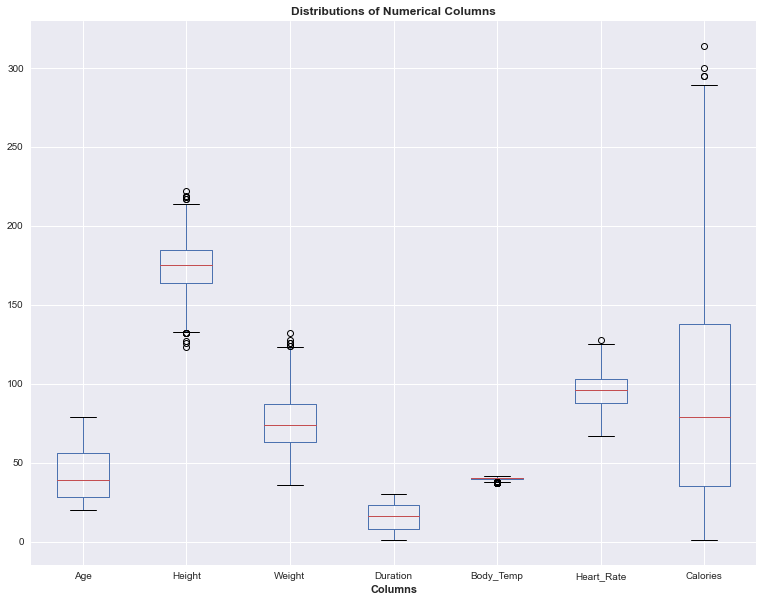

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
numerical_columns = ['Age', 'Height', 'Weight', 'Duration', 'Body_Temp', 'Heart_Rate', 'Calories']
numerical_df = exercise_calories[numerical_columns]
numerical_df.boxplot()
ax.set_title('Distributions of Numerical Columns')
ax.set_xlabel('Columns');

#### Question: What is the probability distribution for each numerical column?

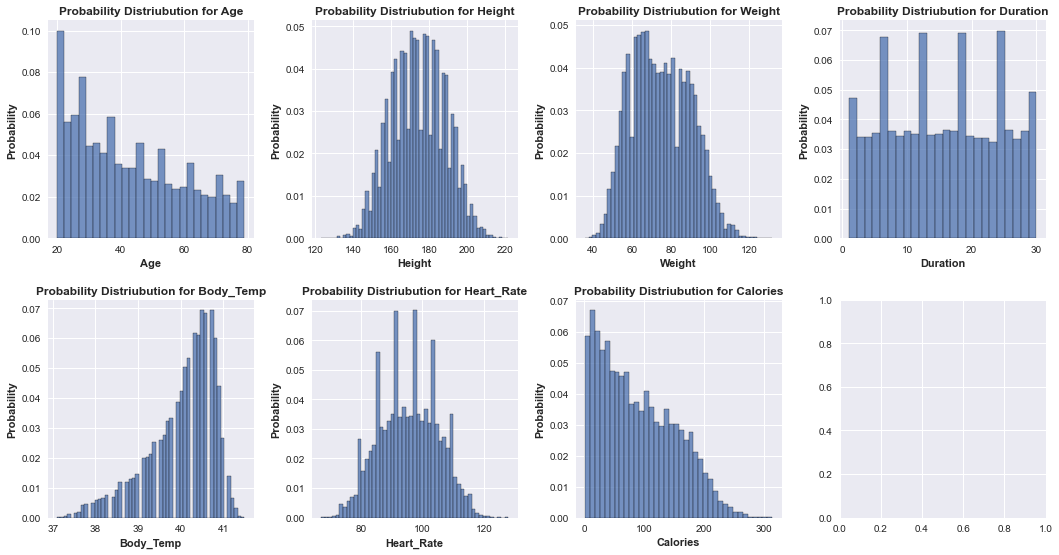

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
n = 0
for col in numerical_columns:
    sns.histplot(data=exercise_calories, x=col, ax=ax[n // 4, n %4], stat='probability')
    ax[n // 4, n % 4].set_title(f'Probability Distriubution for {col}')
    n += 1

plt.tight_layout();